In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from load_data import load
import scipy.stats as stats
from scipy.stats import f_oneway

In [51]:
df = load()

In [52]:
df.head()

RegionID  SizeRankZip  RegionName RegionType State         City  \
0     91982            1       77494        zip    TX         Katy   
1     91940            3       77449        zip    TX         Katy   
2     91733            5       77084        zip    TX      Houston   
3     91926           11       77433        zip    TX      Cypress   
4     92036           25       77573        zip    TX  League City   

                                  Metro        CountyName      ZHVI 2003  \
0  Houston-The Woodlands-Sugar Land, TX  Fort Bend County  215776.356117   
1  Houston-The Woodlands-Sugar Land, TX     Harris County  111490.450128   
2  Houston-The Woodlands-Sugar Land, TX     Harris County  109631.516990   
3  Houston-The Woodlands-Sugar Land, TX     Harris County  197878.948831   
4  Houston-The Woodlands-Sugar Land, TX  Galveston County  159151.702851   

       ZHVI 2008  ...  Transit Jobs  Transit Trips/Week  Transit Routes  \
0  244120.000781  ...            56                  40             0.0   
1  124187.861811  ...            56                  40             0.0   
2  123577.558321  ...       218,774               1,900             5.0   
3  221744.762112  ...           NaN                 NaN             NaN   
4  190430.187900  ...           NaN                 NaN             NaN   

   Transit Shed (sq mi)  Transit percentage  Population  Unnamed: 0 STATEFP  \
0                   0.0               0.013      24,783     38085.0    48.0   
1                   0.0               0.013      24,783     38107.0    48.0   
2                  31.0               0.039   2,439,835     38107.0    48.0   
3                   NaN                 NaN         NaN     38107.0    48.0   
4                   NaN                 NaN         NaN     38090.0    48.0   

   COUNTYFP  NatWalkInd  
0     157.0    7.968900  
1     201.0   11.430193  
2     201.0   11.430193  
3     201.0   11.430193  
4     167.0    7.878866  

[5 rows x 64 columns]

In [63]:
print(df.shape)
print(df.nunique())
print(df.info())

(124315, 64)
RegionID       13293
SizeRankZip     9472
RegionName     13293
RegionType         1
State             48
               ...  
Population      1280
Unnamed: 0      1578
STATEFP           48
COUNTYFP         210
NatWalkInd      1464
Length: 64, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124315 entries, 0 to 124314
Data columns (total 64 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RegionID               124315 non-null  int64  
 1   SizeRankZip            124315 non-null  int64  
 2   RegionName             124315 non-null  int64  
 3   RegionType             124315 non-null  object 
 4   State                  124315 non-null  object 
 5   City                   115971 non-null  object 
 6   Metro                  7716 non-null    object 
 7   CountyName             124315 non-null  object 
 8   ZHVI 2003              29800 non-null   float64
 9   ZHVI 2008              34973 non

In [69]:
df_2019 = df[['ZHVI 2019','ZORI 2019','Sales 2019','Sale Listings 2019','Days on Market 2019','New Construction 2019','Transit Score','RegionID','RegionName','SizeRankZip','State','City','Population','NatWalkInd']]

In [72]:
df_2019 = df_2019.dropna(subset=['ZHVI 2019','ZORI 2019','Sales 2019','Sale Listings 2019','Days on Market 2019','New Construction 2019','Transit Score','RegionID','RegionName','SizeRankZip','State','City','Population','NatWalkInd'])
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 7451
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ZHVI 2019              1167 non-null   float64
 1   ZORI 2019              1167 non-null   float64
 2   Sales 2019             1167 non-null   float64
 3   Sale Listings 2019     1167 non-null   float64
 4   Days on Market 2019    1167 non-null   float64
 5   New Construction 2019  1167 non-null   float64
 6   Transit Score          1167 non-null   float64
 7   RegionID               1167 non-null   int64  
 8   RegionName             1167 non-null   int64  
 9   SizeRankZip            1167 non-null   int64  
 10  State                  1167 non-null   object 
 11  City                   1167 non-null   object 
 12  Population             1167 non-null   object 
 13  NatWalkInd             1167 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 136.8+ KB


In [74]:
df_2019['Population'] = df_2019['Population'].str.replace(',', '').astype(float)

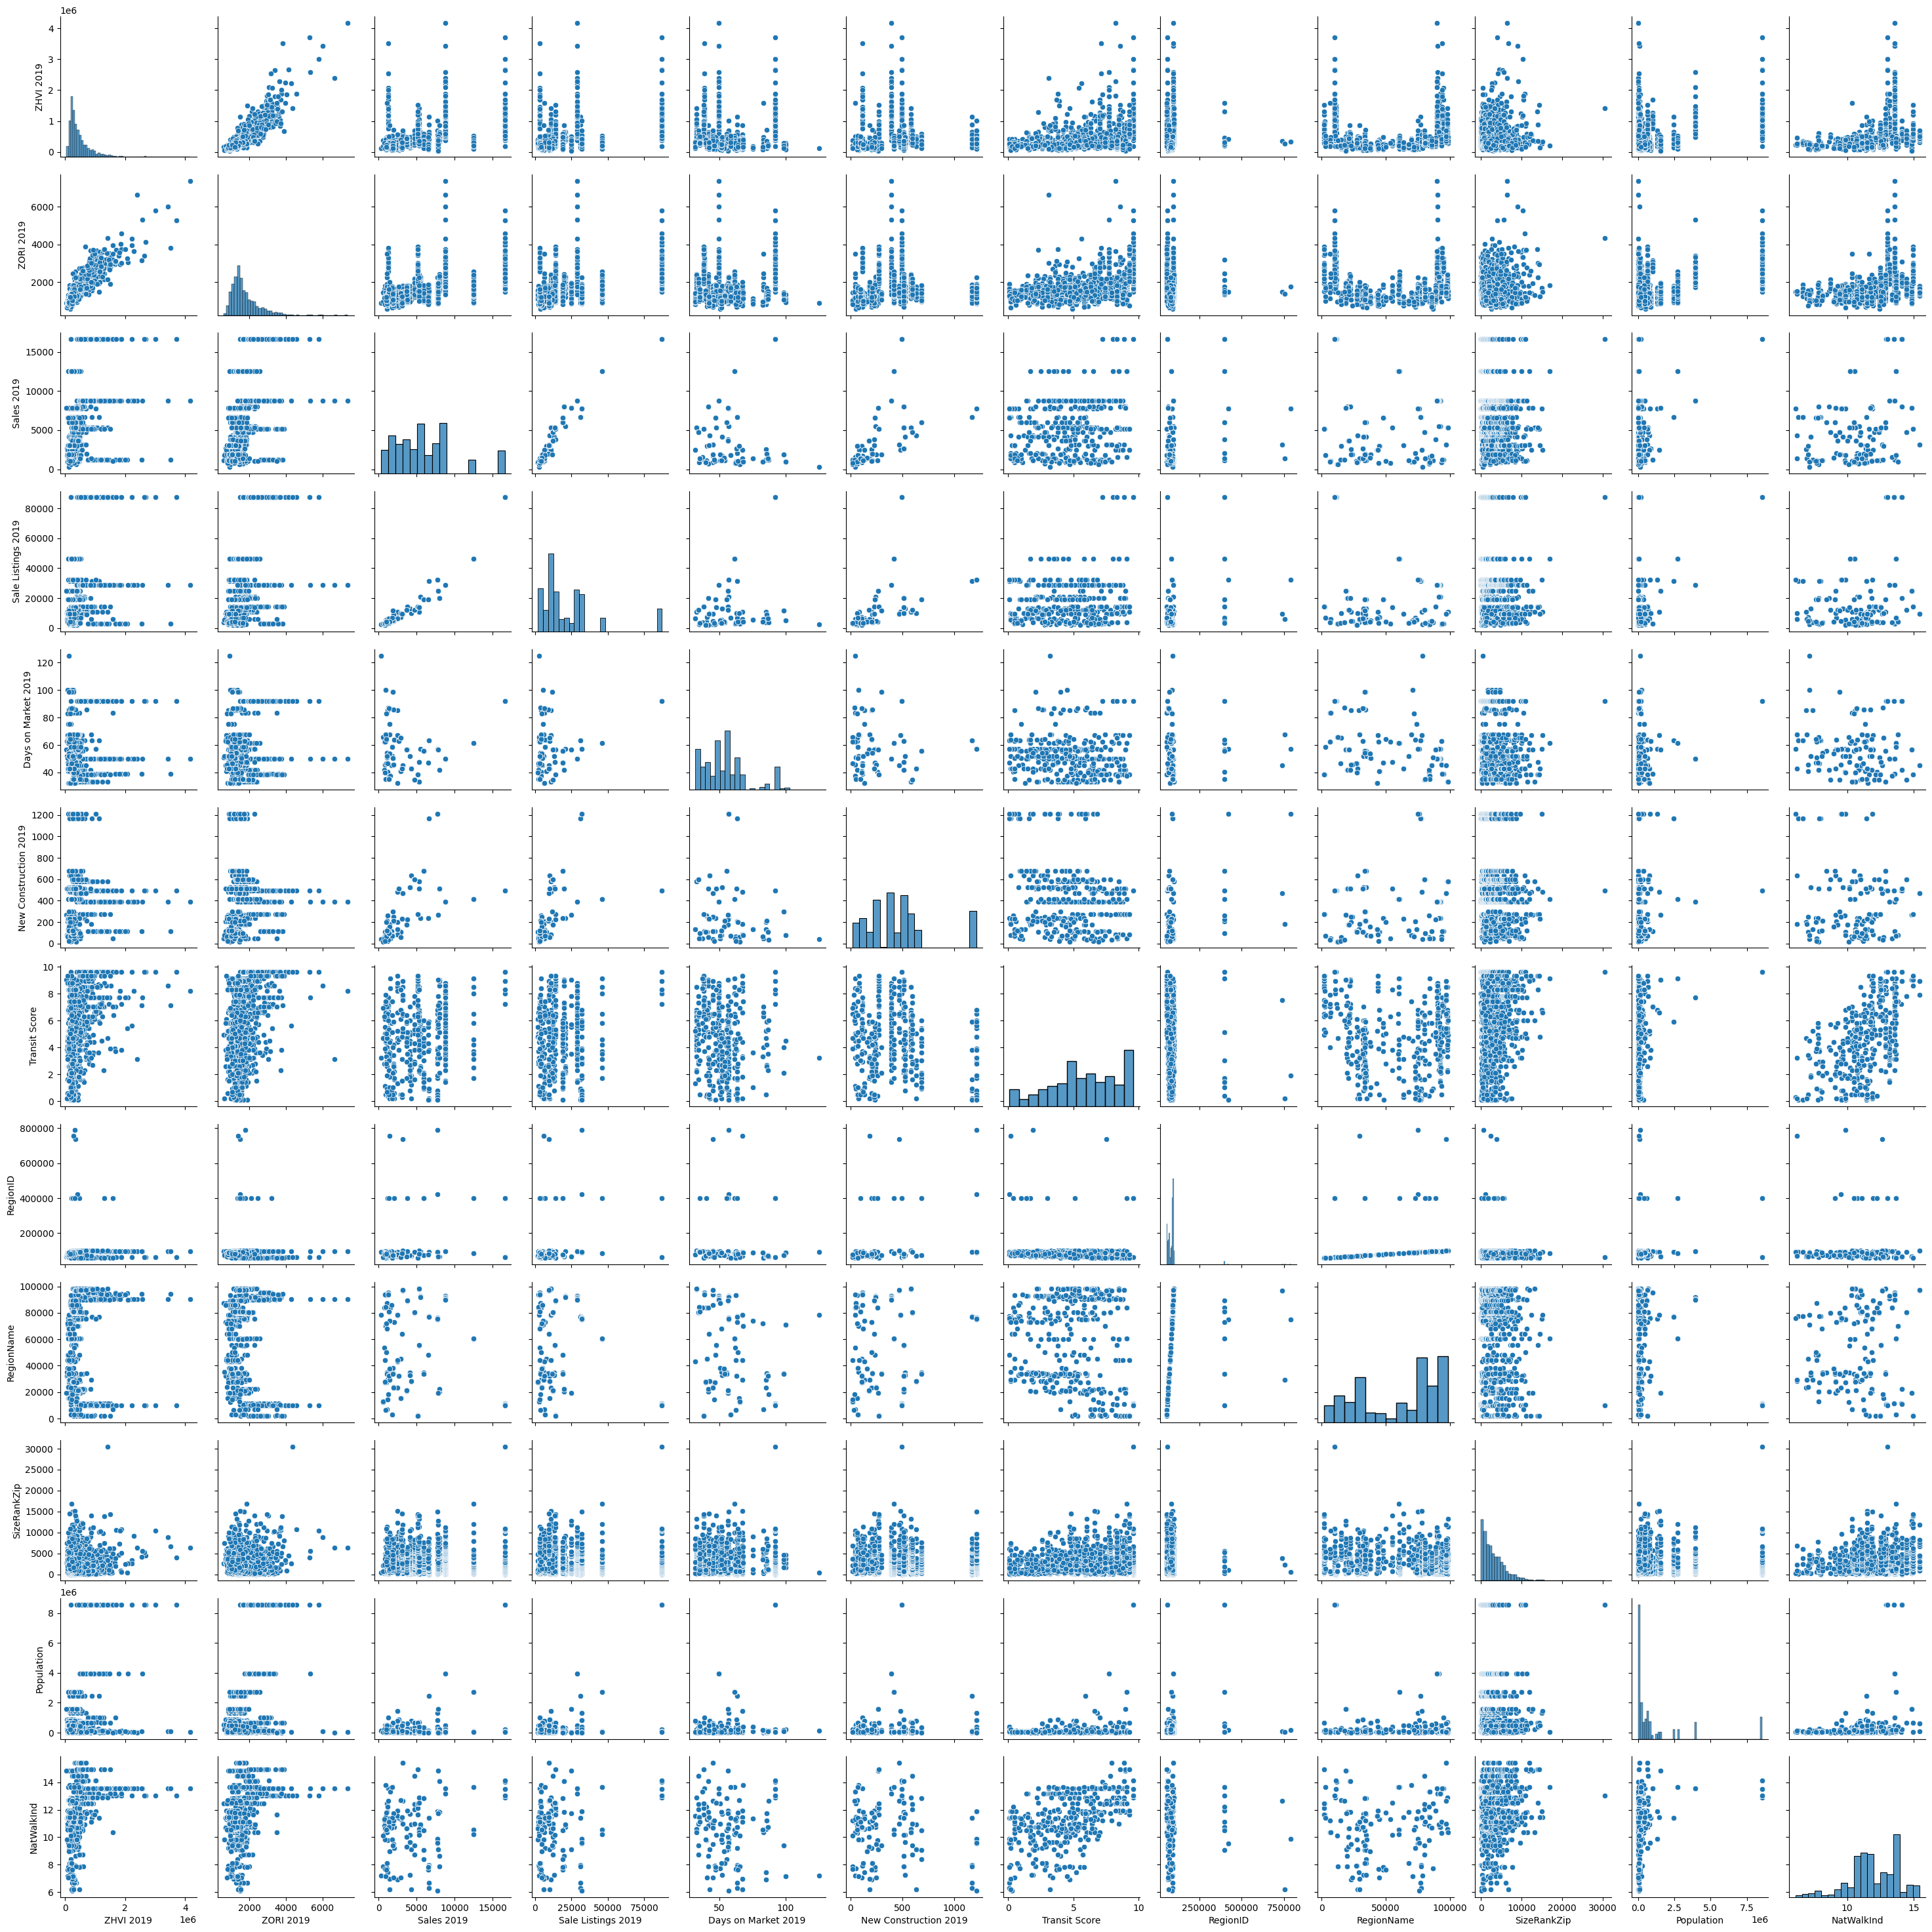

In [77]:
sns.pairplot(df_2019)

<Axes: xlabel='ZHVI 2019', ylabel='ZORI 2019'>

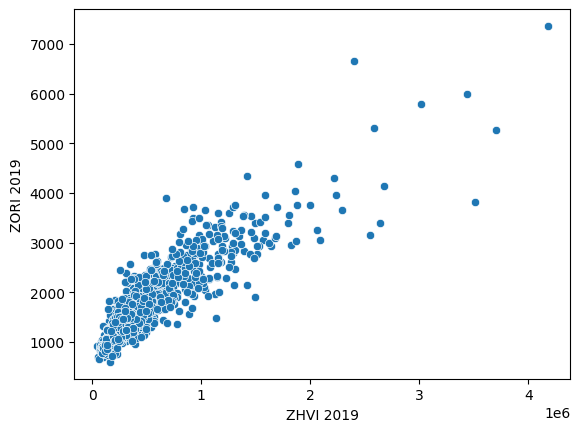

In [78]:
sns.scatterplot(df_2019, x="ZHVI 2019", y="ZORI 2019")

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


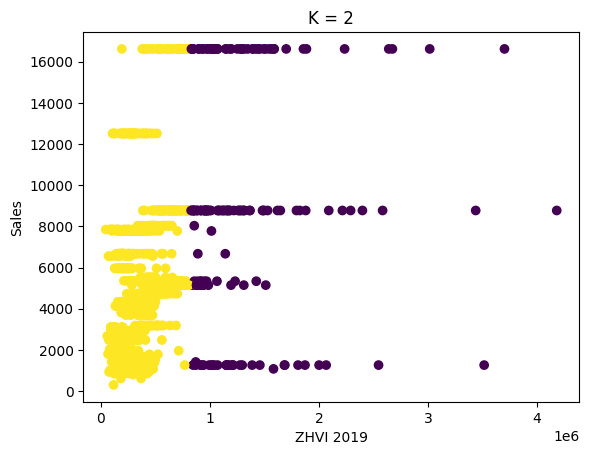

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


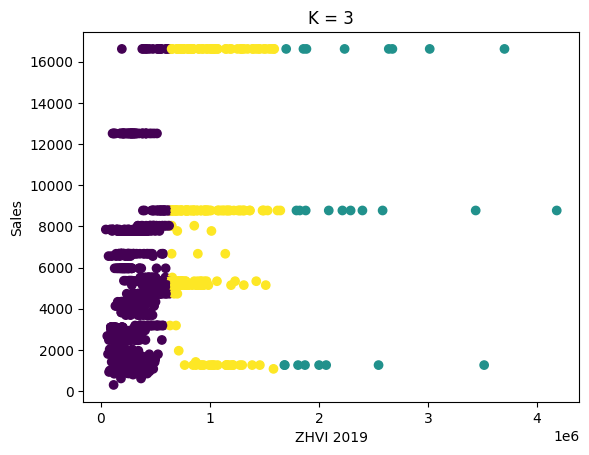

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


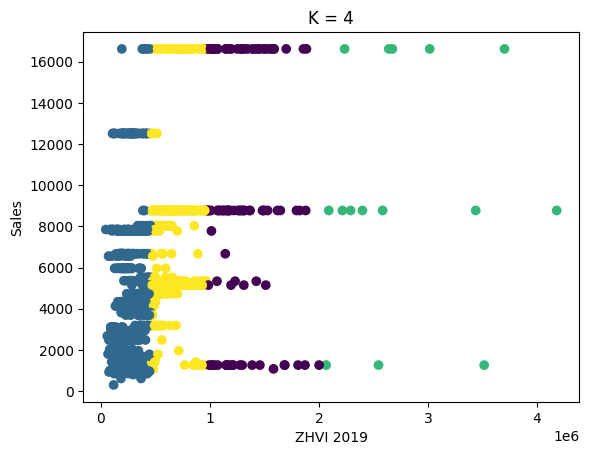

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


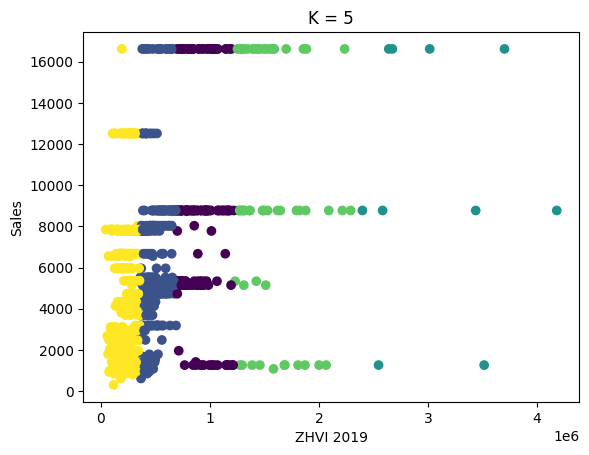

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


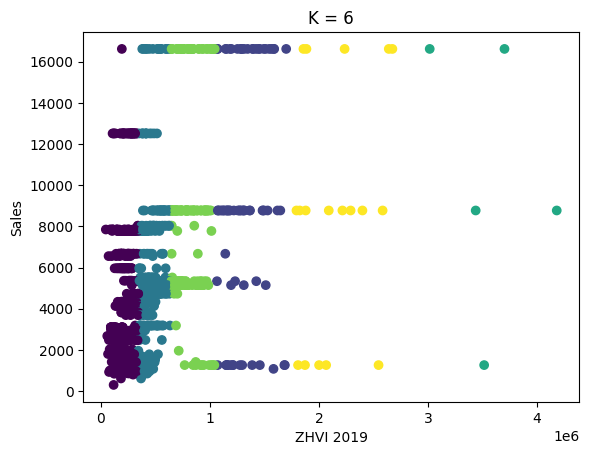

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


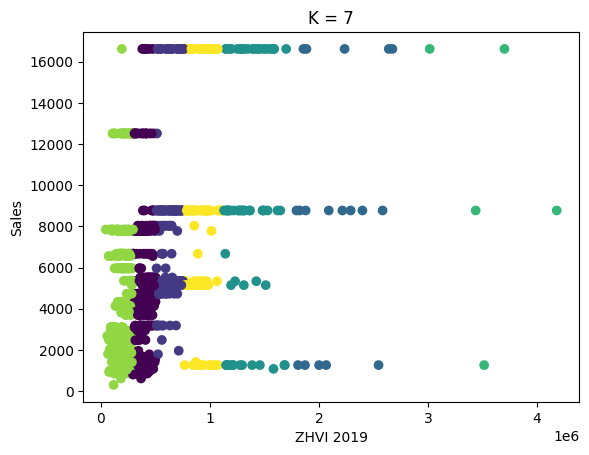

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


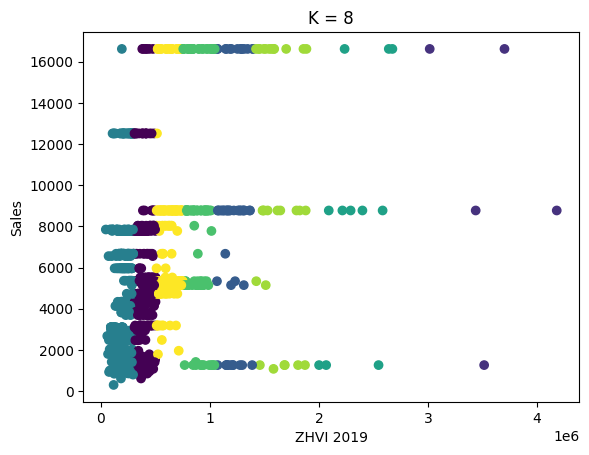

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


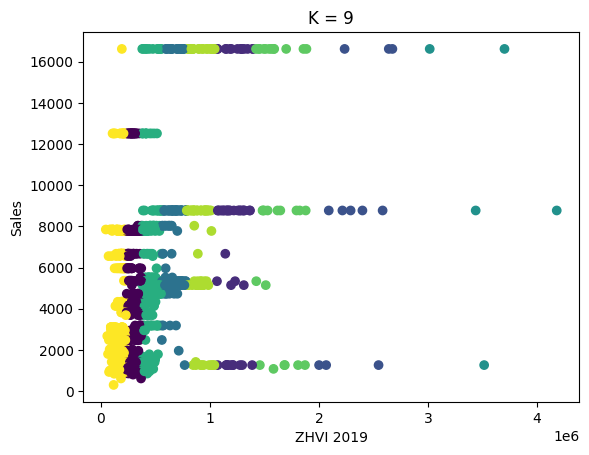

<Figure size 640x480 with 0 Axes>

In [96]:
for k in range(2, 10):
    kmeans1 = KMeans(n_clusters=k).fit(df_2019[["ZHVI 2019", "Sales 2019"]])
    plt.scatter(df_2019['ZHVI 2019'], df_2019['Sales 2019'], c=kmeans1.labels_)
    plt.title(f"K = {k}")
    plt.ylabel('Sales')
    plt.xlabel('ZHVI 2019')
    plt.show()
    plt.clf()

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


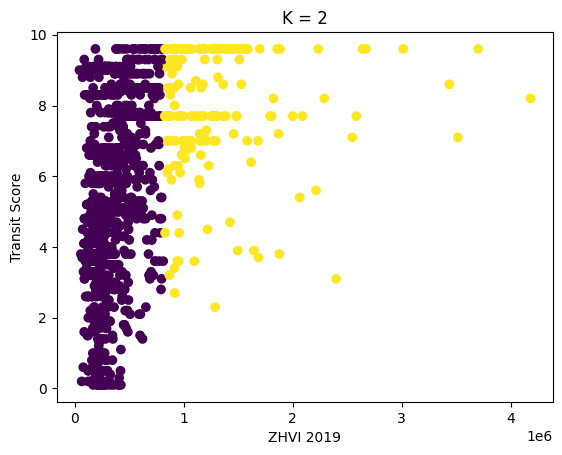

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


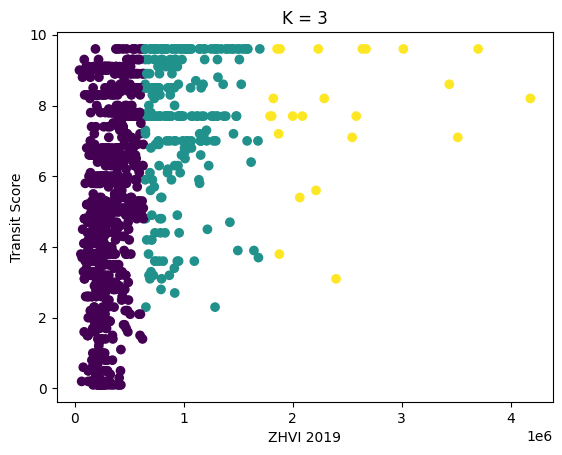

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


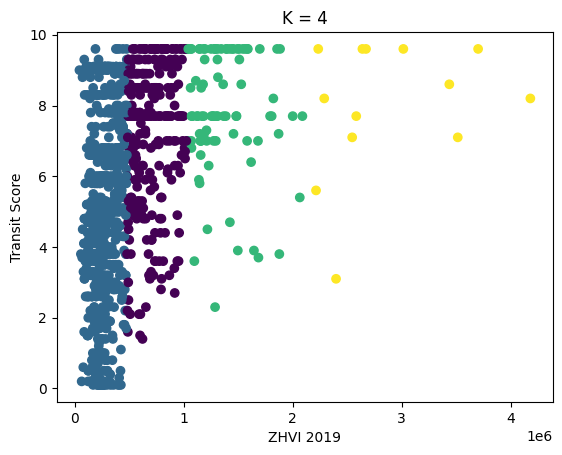

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


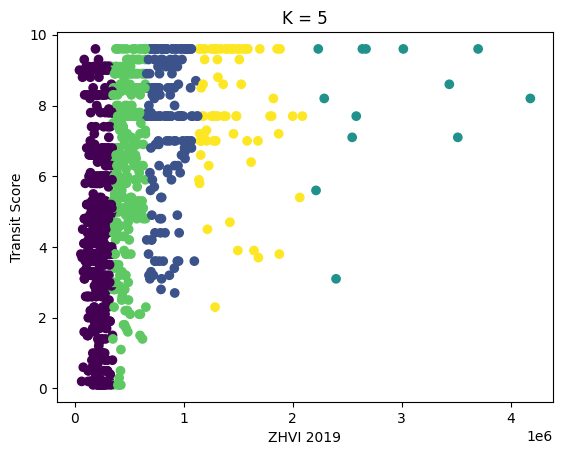

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


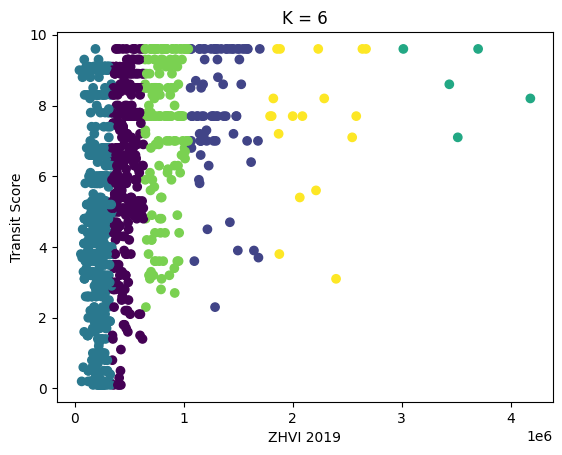

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


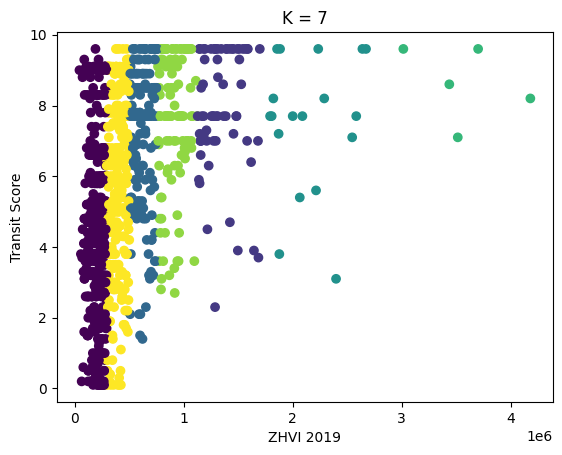

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


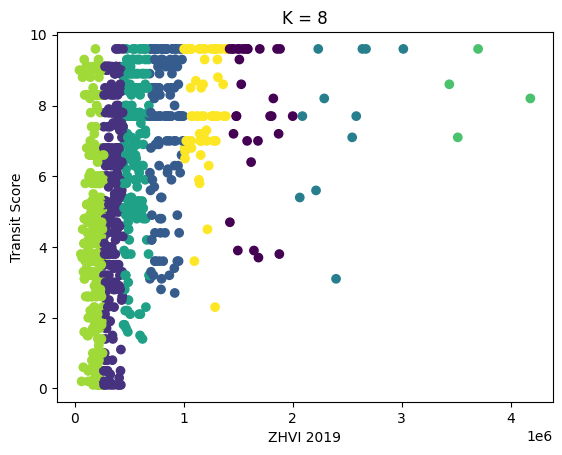

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


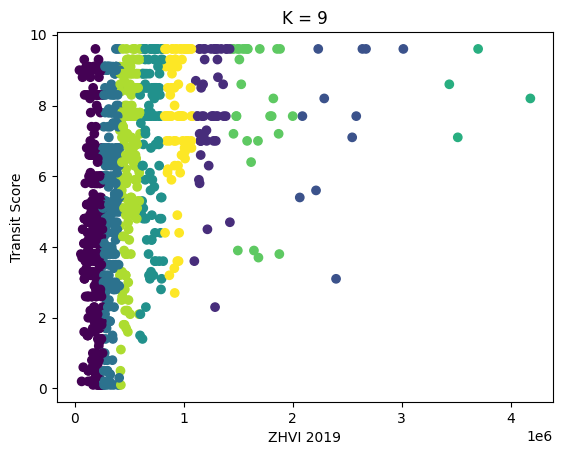

<Figure size 640x480 with 0 Axes>

In [97]:
for k in range(2, 10):
    kmeans2 = KMeans(n_clusters=k).fit(df_2019[["ZHVI 2019", "Transit Score"]])
    plt.scatter(df_2019['ZHVI 2019'], df_2019['Transit Score'], c=kmeans2.labels_)
    plt.title(f"K = {k}")
    plt.ylabel('Transit Score')
    plt.xlabel('ZHVI 2019')
    plt.show()
    plt.clf()

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


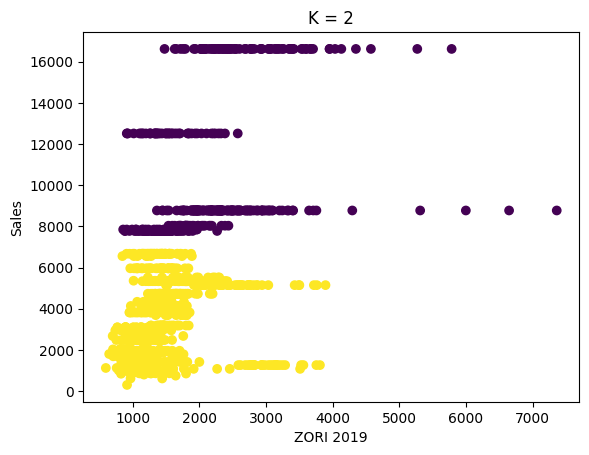

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


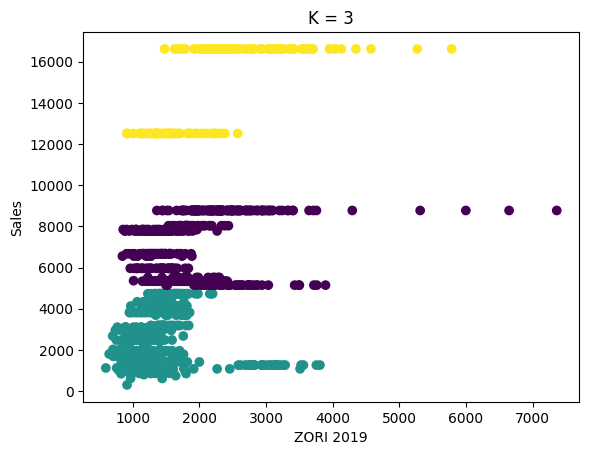

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


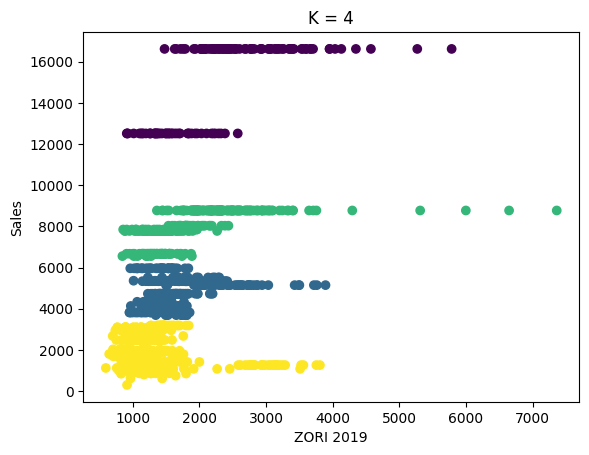

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


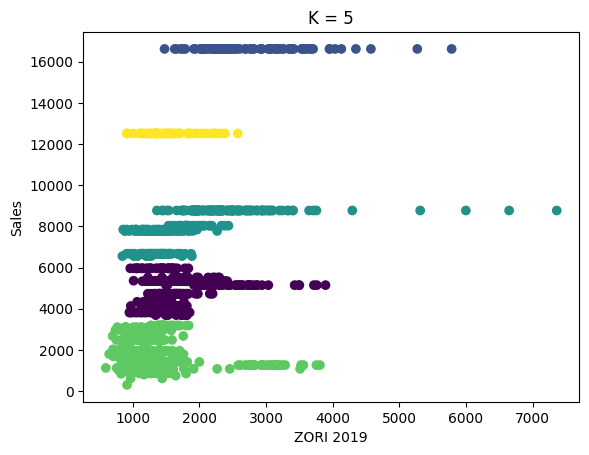

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


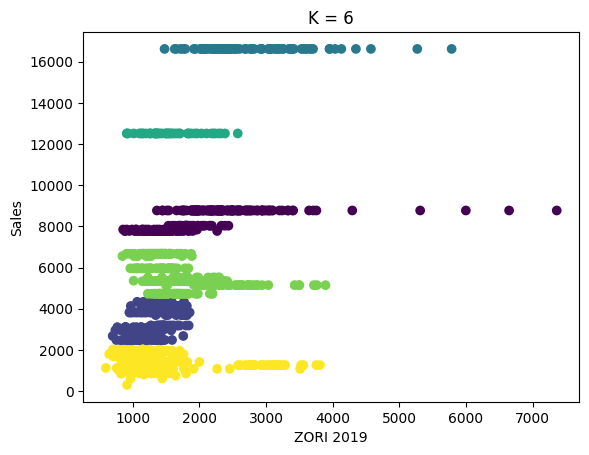

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


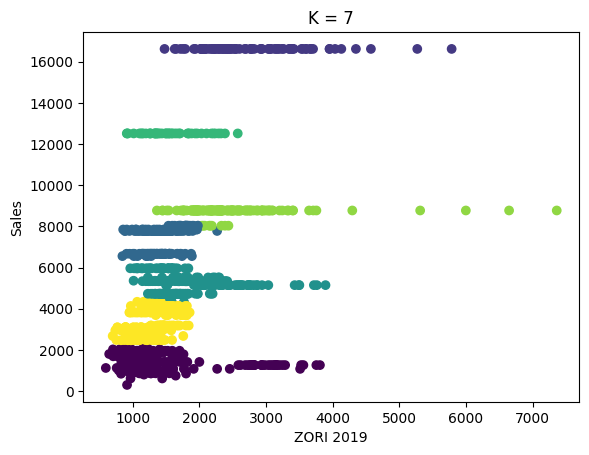

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


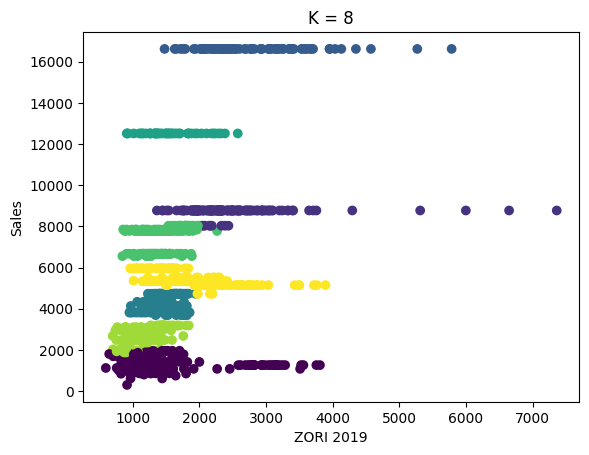

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


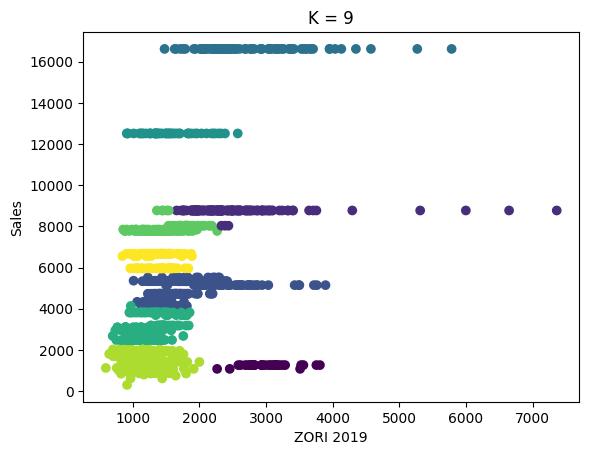

<Figure size 640x480 with 0 Axes>

In [99]:
for k in range(2, 10):
    kmeans3 = KMeans(n_clusters=k).fit(df_2019[["ZORI 2019", "Sales 2019"]])
    plt.scatter(df_2019['ZORI 2019'], df_2019['Sales 2019'], c=kmeans3.labels_)
    plt.title(f"K = {k}")
    plt.ylabel('Sales')
    plt.xlabel('ZORI 2019')
    plt.show()
    plt.clf()

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


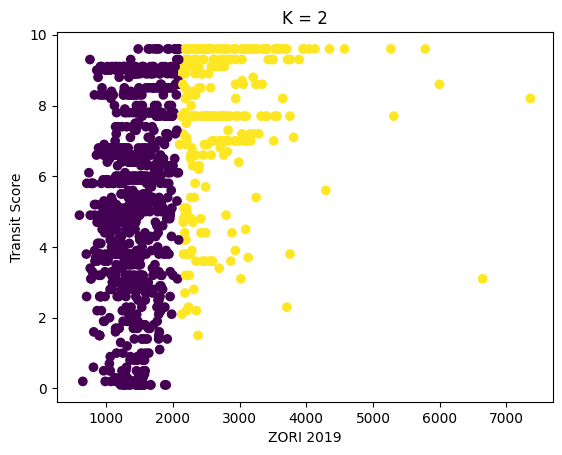

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


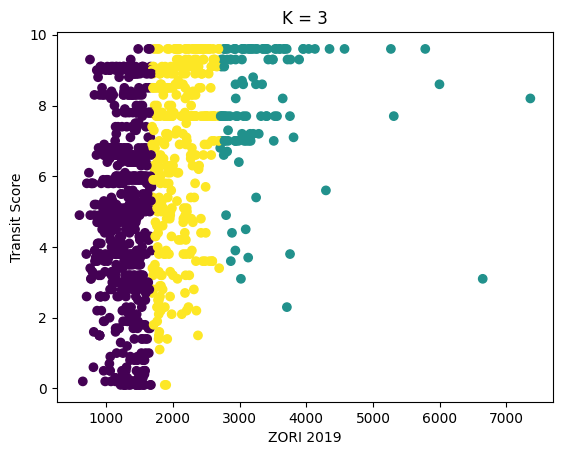

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


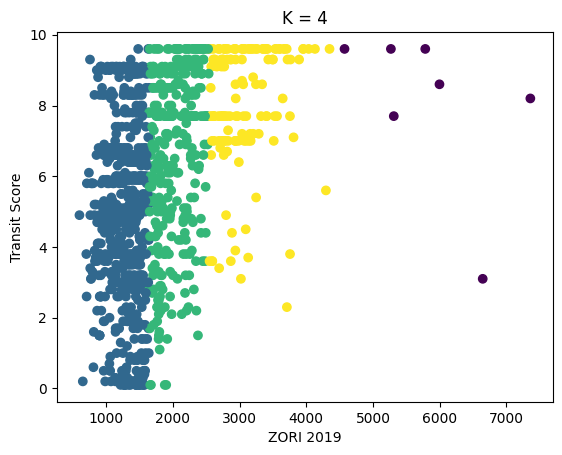

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


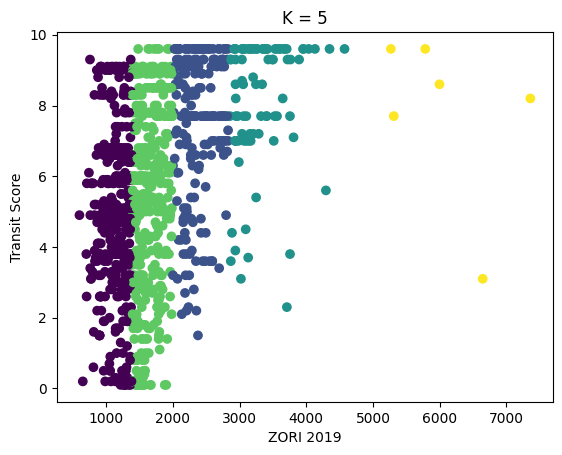

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


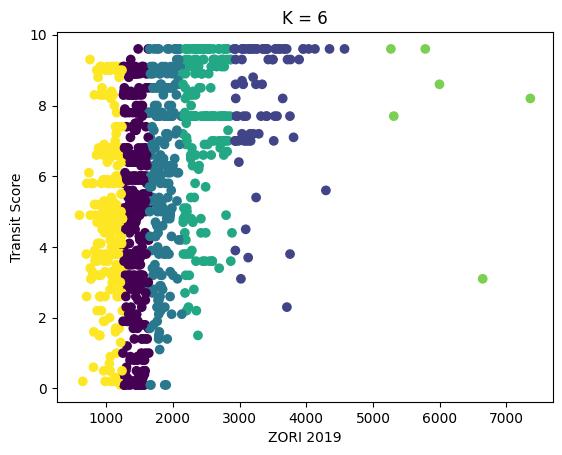

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


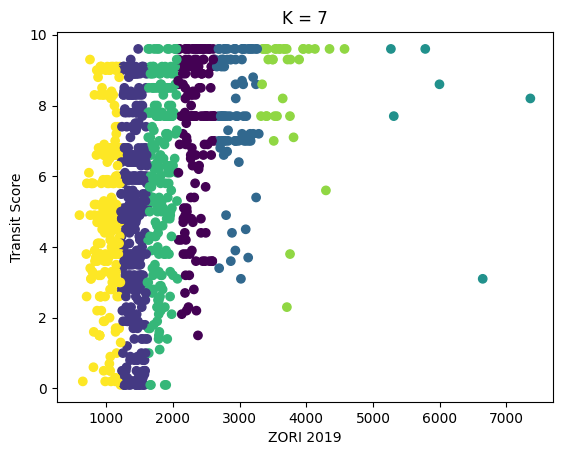

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


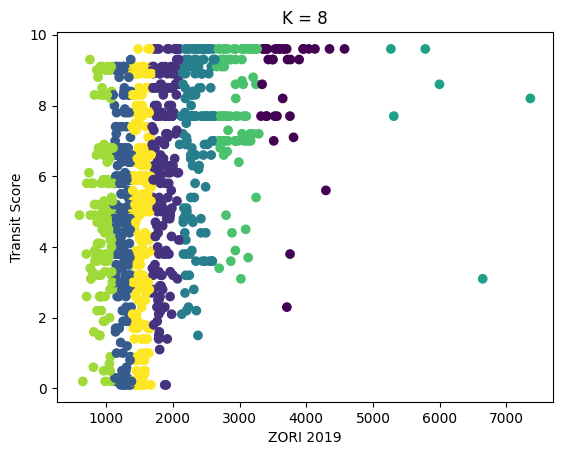

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


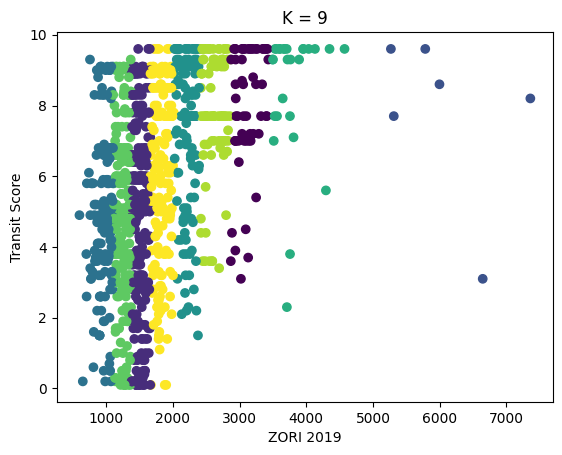

<Figure size 640x480 with 0 Axes>

In [98]:
for k in range(2, 10):
    kmeans4 = KMeans(n_clusters=k).fit(df_2019[["ZORI 2019", "Transit Score"]])
    plt.scatter(df_2019['ZORI 2019'], df_2019['Transit Score'], c=kmeans4.labels_)
    plt.title(f"K = {k}")
    plt.ylabel('Transit Score')
    plt.xlabel('ZORI 2019')
    plt.show()
    plt.clf()

In [102]:
for k in range(2, 10):
    print(f"k={k}")
    clusters = KMeans(n_clusters = k).fit_predict(df_2019[['ZHVI 2019', 'Sales 2019']])
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print()

k=2
Cluster 0 count: 995
Cluster 1 count: 172

k=3
Cluster 0 count: 891
Cluster 1 count: 249
Cluster 2 count: 27

k=4
Cluster 0 count: 745
Cluster 1 count: 15
Cluster 2 count: 310
Cluster 3 count: 97

k=5
Cluster 0 count: 590
Cluster 1 count: 74
Cluster 2 count: 331
Cluster 3 count: 13
Cluster 4 count: 159

k=6
Cluster 0 count: 589
Cluster 1 count: 68
Cluster 2 count: 159
Cluster 3 count: 5
Cluster 4 count: 328
Cluster 5 count: 18

k=7


/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Cluster 0 count: 501
Cluster 1 count: 97
Cluster 2 count: 18
Cluster 3 count: 176
Cluster 4 count: 5
Cluster 5 count: 53
Cluster 6 count: 317

k=8
Cluster 0 count: 202
Cluster 1 count: 314
Cluster 2 count: 58
Cluster 3 count: 4
Cluster 4 count: 27
Cluster 5 count: 121
Cluster 6 count: 432
Cluster 7 count: 9

k=9
Cluster 0 count: 81
Cluster 1 count: 298
Cluster 2 count: 11
Cluster 3 count: 28
Cluster 4 count: 206
Cluster 5 count: 4
Cluster 6 count: 367
Cluster 7 count: 48
Cluster 8 count: 124



/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [104]:
for k in range(2, 10):
    print(f"k={k}")
    clusters = KMeans(n_clusters = k).fit_predict(df_2019[['ZHVI 2019', 'Transit Score']])
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print()

k=2
Cluster 0 count: 995
Cluster 1 count: 172

k=3
Cluster 0 count: 250
Cluster 1 count: 891
Cluster 2 count: 26

k=4
Cluster 0 count: 752
Cluster 1 count: 97
Cluster 2 count: 13
Cluster 3 count: 305

k=5
Cluster 0 count: 599
Cluster 1 count: 160
Cluster 2 count: 10
Cluster 3 count: 342
Cluster 4 count: 56

k=6
Cluster 0 count: 568
Cluster 1 count: 170
Cluster 2 count: 18
Cluster 3 count: 331
Cluster 4 count: 5
Cluster 5 count: 75

k=7
Cluster 0 count: 471
Cluster 1 count: 66
Cluster 2 count: 5
Cluster 3 count: 173
Cluster 4 count: 18
Cluster 5 count: 327
Cluster 6 count: 107

k=8


/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Cluster 0 count: 417
Cluster 1 count: 64
Cluster 2 count: 201
Cluster 3 count: 5
Cluster 4 count: 29
Cluster 5 count: 124
Cluster 6 count: 316
Cluster 7 count: 11

k=9
Cluster 0 count: 207
Cluster 1 count: 11
Cluster 2 count: 365
Cluster 3 count: 27
Cluster 4 count: 81
Cluster 5 count: 5
Cluster 6 count: 299
Cluster 7 count: 48
Cluster 8 count: 124



/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
for k in range(2, 10):
    print(f"k={k}")
    clusters = KMeans(n_clusters = k).fit_predict(df_2019[['ZORI 2019', 'Sales 2019']])
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print()

k=2
Cluster 0 count: 409
Cluster 1 count: 758

k=3
Cluster 0 count: 517
Cluster 1 count: 521
Cluster 2 count: 129

k=4
Cluster 0 count: 343
Cluster 1 count: 350
Cluster 2 count: 129
Cluster 3 count: 345

k=5
Cluster 0 count: 343
Cluster 1 count: 350
Cluster 2 count: 81
Cluster 3 count: 345
Cluster 4 count: 48

k=6
Cluster 0 count: 280
Cluster 1 count: 249
Cluster 2 count: 81
Cluster 3 count: 48
Cluster 4 count: 294
Cluster 5 count: 215

k=7
Cluster 0 count: 187
Cluster 1 count: 246
Cluster 2 count: 81
Cluster 3 count: 234
Cluster 4 count: 48
Cluster 5 count: 215
Cluster 6 count: 156

k=8
Cluster 0 count: 170
Cluster 1 count: 156
Cluster 2 count: 81
Cluster 3 count: 195
Cluster 4 count: 48
Cluster 5 count: 187
Cluster 6 count: 180
Cluster 7 count: 150

k=9
Cluster 0 count: 187
Cluster 1 count: 130
Cluster 2 count: 81
Cluster 3 count: 48
Cluster 4 count: 182
Cluster 5 count: 180
Cluster 6 count: 156
Cluster 7 count: 33
Cluster 8 count: 170



/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

In [106]:
for k in range(2, 10):
    print(f"k={k}")
    clusters = KMeans(n_clusters = k).fit_predict(df_2019[['ZORI 2019', 'Transit Score']])
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print()

k=2
Cluster 0 count: 897
Cluster 1 count: 270

k=3
Cluster 0 count: 347
Cluster 1 count: 117
Cluster 2 count: 703

k=4
Cluster 0 count: 680
Cluster 1 count: 135
Cluster 2 count: 346
Cluster 3 count: 6

k=5
Cluster 0 count: 420
Cluster 1 count: 448
Cluster 2 count: 207
Cluster 3 count: 86
Cluster 4 count: 6

k=6
Cluster 0 count: 177
Cluster 1 count: 412
Cluster 2 count: 81
Cluster 3 count: 235
Cluster 4 count: 6
Cluster 5 count: 256

k=7
Cluster 0 count: 408
Cluster 1 count: 153
Cluster 2 count: 37
Cluster 3 count: 256
Cluster 4 count: 225
Cluster 5 count: 82
Cluster 6 count: 6

k=8


/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Cluster 0 count: 258
Cluster 1 count: 81
Cluster 2 count: 6
Cluster 3 count: 194
Cluster 4 count: 37
Cluster 5 count: 160
Cluster 6 count: 286
Cluster 7 count: 145

k=9
Cluster 0 count: 166
Cluster 1 count: 181
Cluster 2 count: 57
Cluster 3 count: 6
Cluster 4 count: 274
Cluster 5 count: 27
Cluster 6 count: 123
Cluster 7 count: 251
Cluster 8 count: 82



/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [107]:
scaler = StandardScaler().fit(df_2019[['ZHVI 2019','ZORI 2019','Sales 2019','Transit Score']])
scaled_df = scaler.transform(df_2019[['ZHVI 2019','ZORI 2019','Sales 2019','Transit Score']])
zhvi_scaled = scaled_df[:,0]
zori_scaled = scaled_df[:,1]
sales_scaled = scaled_df[:,2]
transit_scores_scaled = scaled_df[:,3]

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


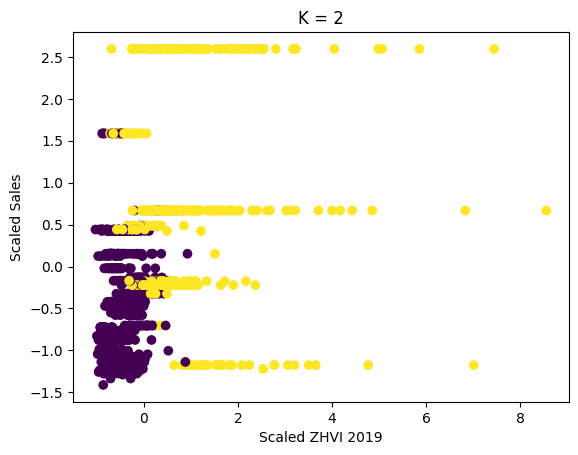

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


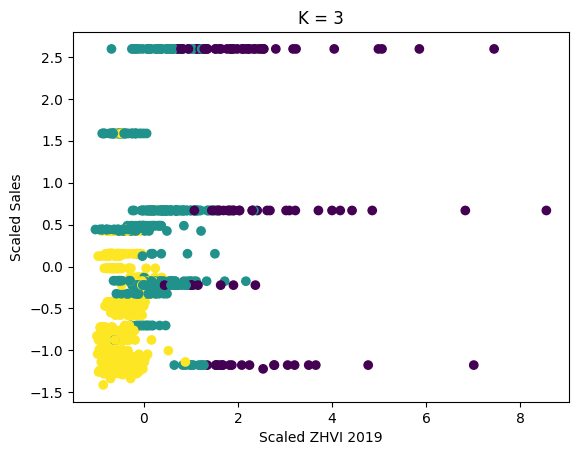

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


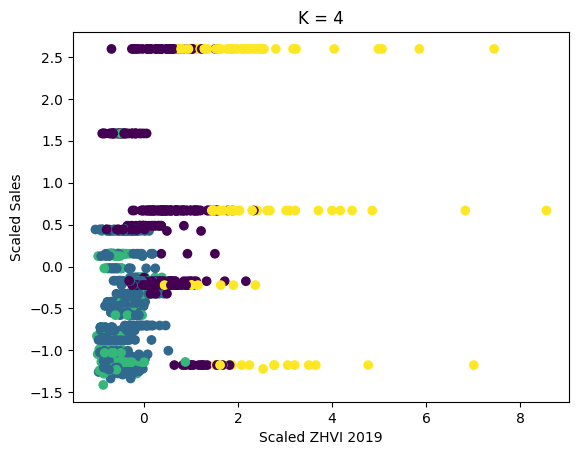

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


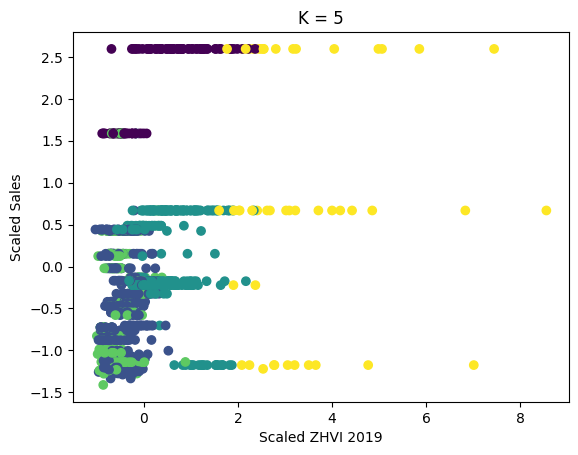

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


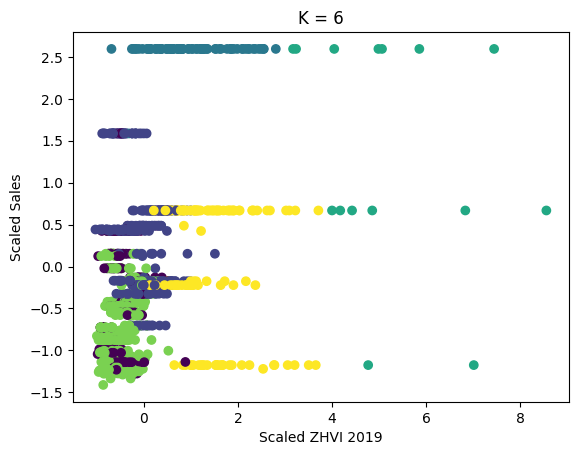

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


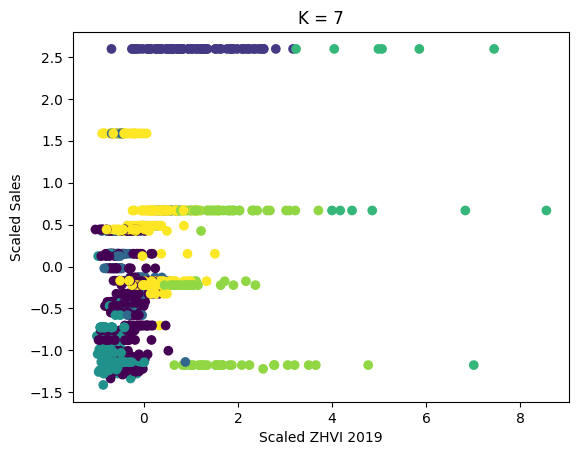

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


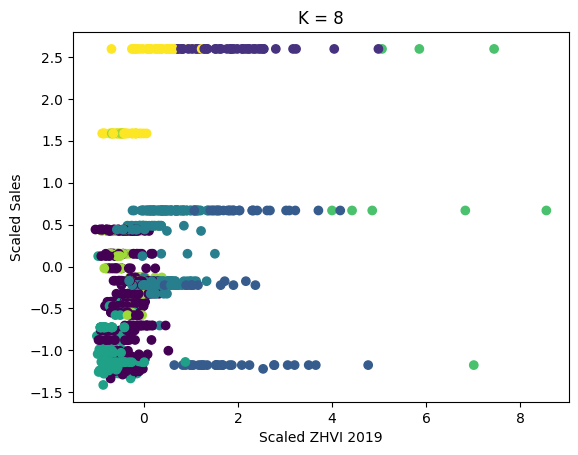

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


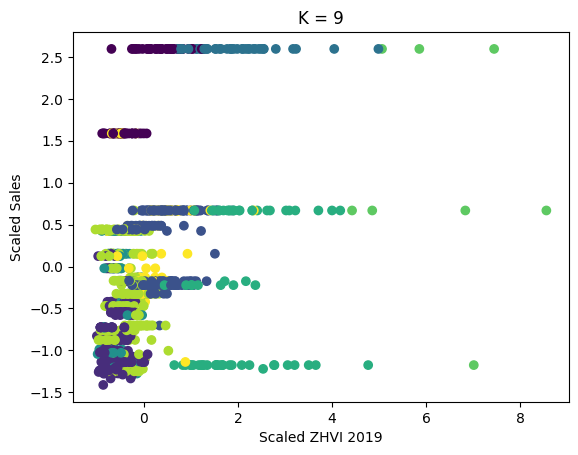

<Figure size 640x480 with 0 Axes>

In [109]:
for k in range(2, 10):
    kmeans5 = KMeans(n_clusters=k).fit(scaled_df)
    cluster_labels = kmeans5.predict(scaled_df)
    plt.scatter(zhvi_scaled, sales_scaled, c=cluster_labels)
    plt.title(f"K = {k}")
    plt.ylabel('Scaled Sales')
    plt.xlabel('Scaled ZHVI 2019')
    plt.show()
    plt.clf()

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


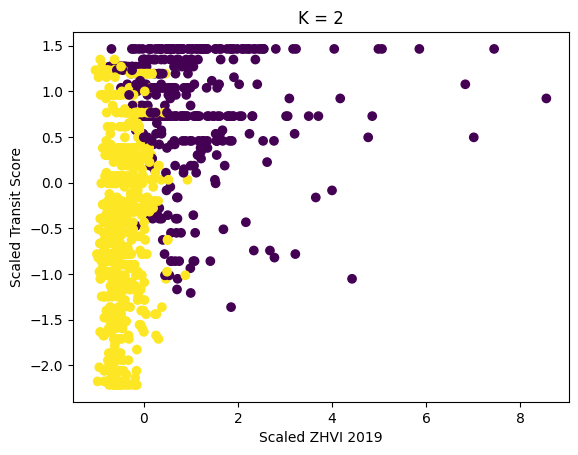

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


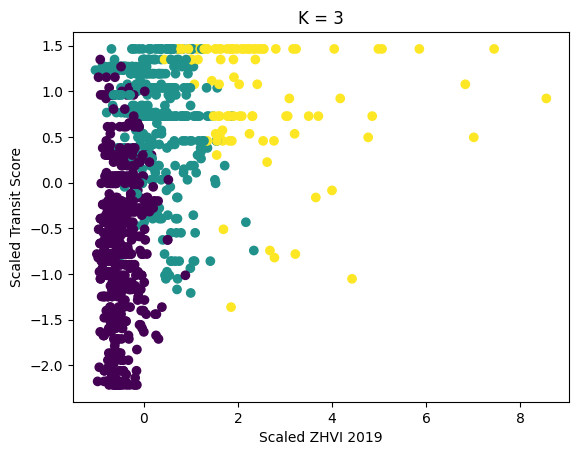

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


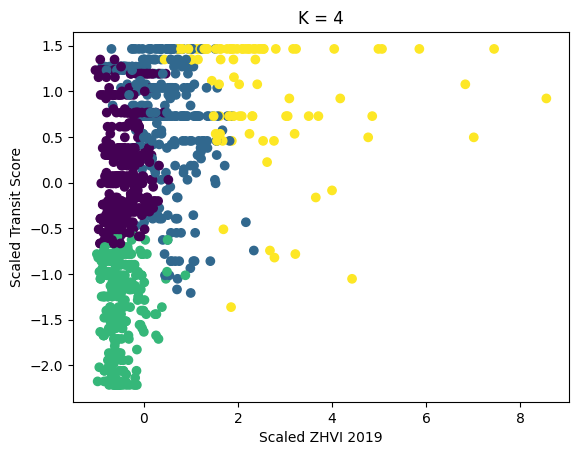

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


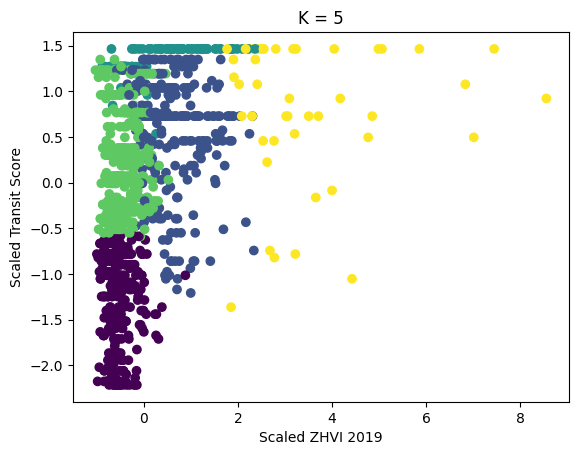

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


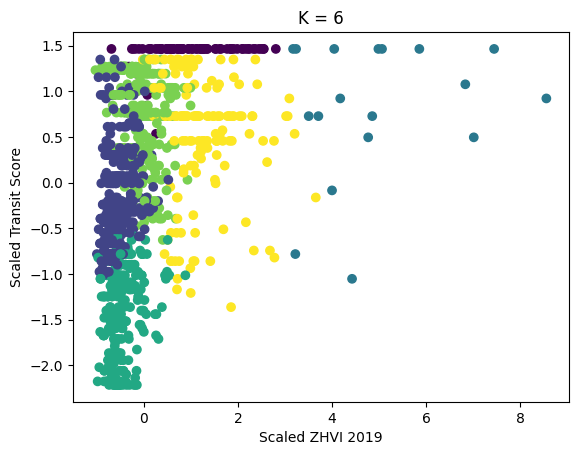

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


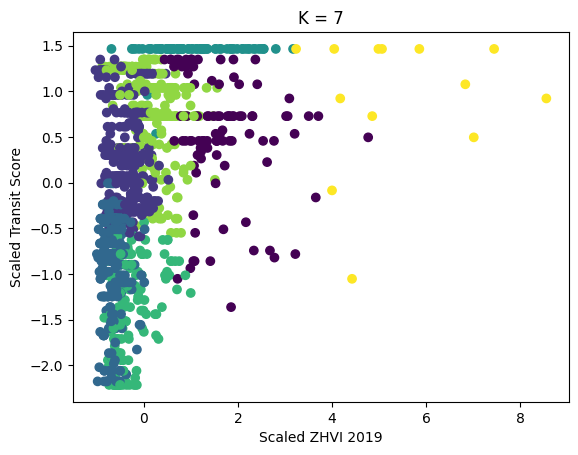

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


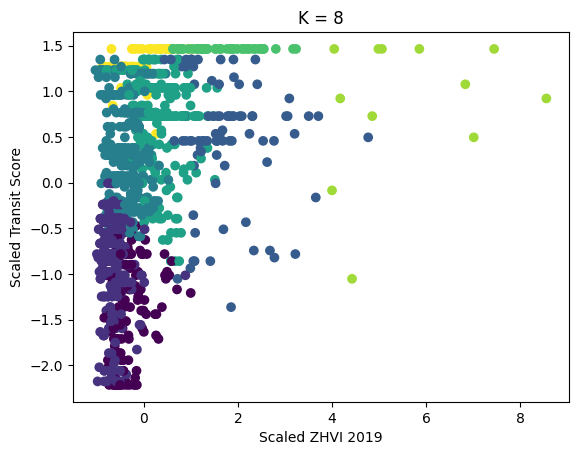

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


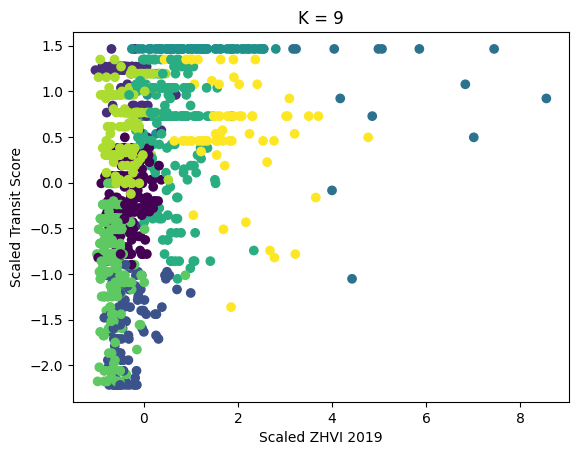

<Figure size 640x480 with 0 Axes>

In [110]:
for k in range(2, 10):
    kmeans5 = KMeans(n_clusters=k).fit(scaled_df)
    cluster_labels = kmeans5.predict(scaled_df)
    plt.scatter(zhvi_scaled, transit_scores_scaled, c=cluster_labels)
    plt.title(f"K = {k}")
    plt.ylabel('Scaled Transit Score')
    plt.xlabel('Scaled ZHVI 2019')
    plt.show()
    plt.clf()

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


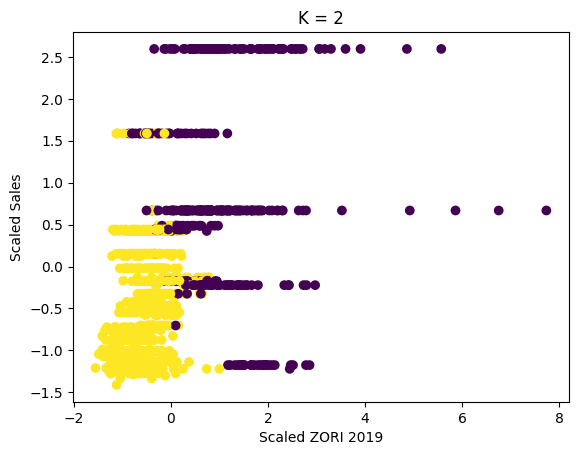

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


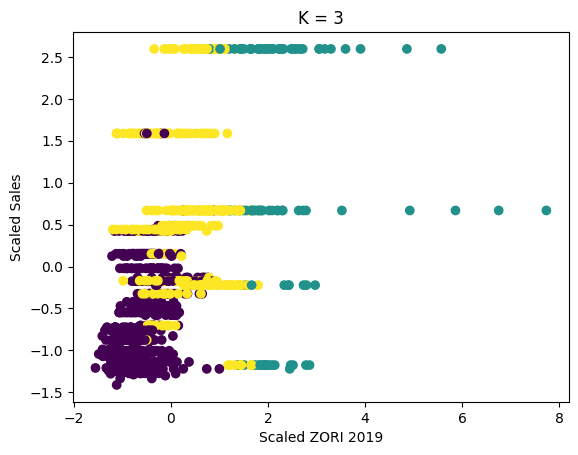

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


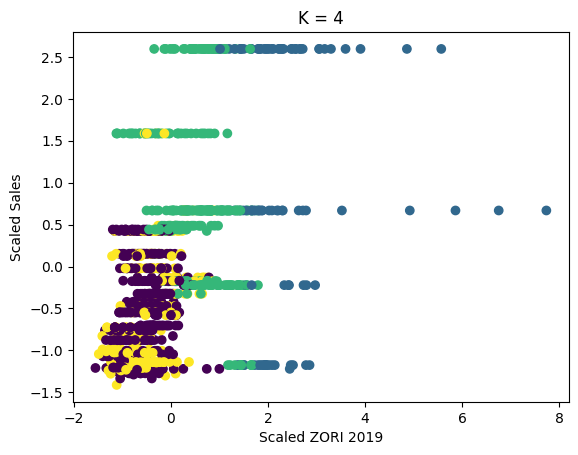

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


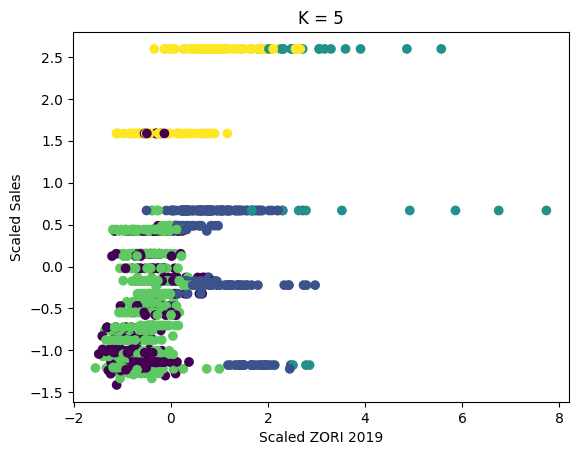

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


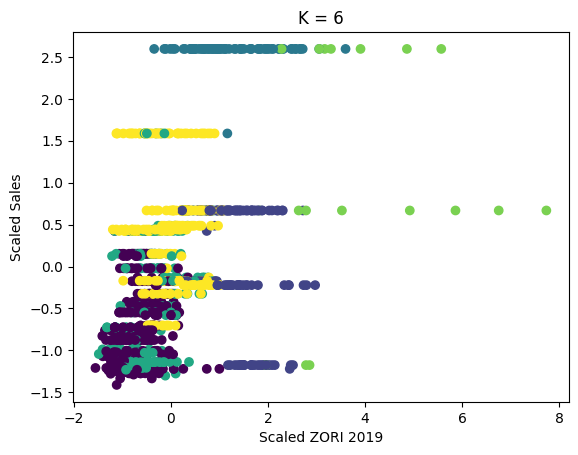

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


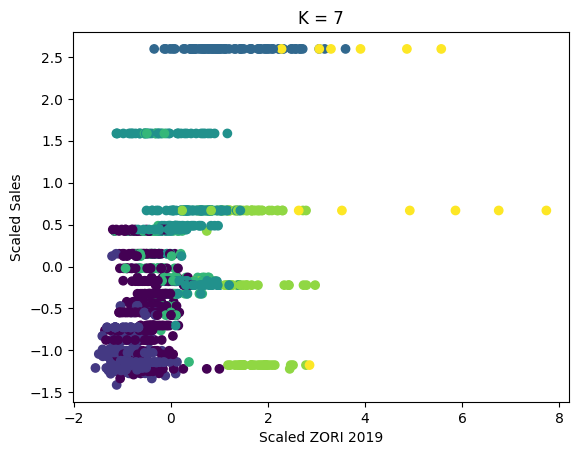

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


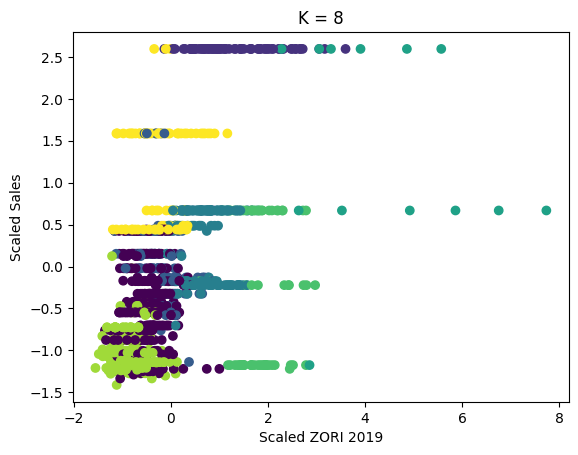

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


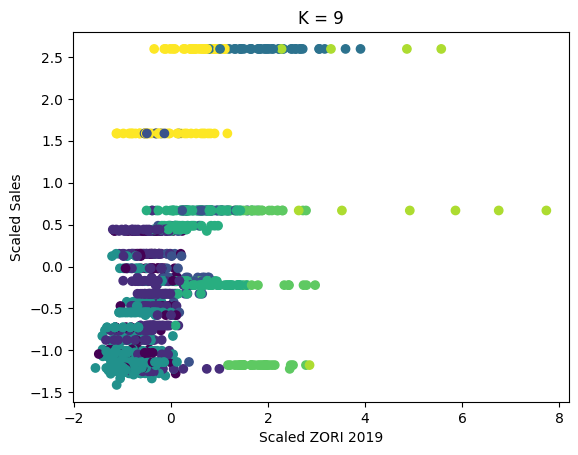

<Figure size 640x480 with 0 Axes>

In [111]:
for k in range(2, 10):
    kmeans5 = KMeans(n_clusters=k).fit(scaled_df)
    cluster_labels = kmeans5.predict(scaled_df)
    plt.scatter(zori_scaled, sales_scaled, c=cluster_labels)
    plt.title(f"K = {k}")
    plt.ylabel('Scaled Sales')
    plt.xlabel('Scaled ZORI 2019')
    plt.show()
    plt.clf()

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


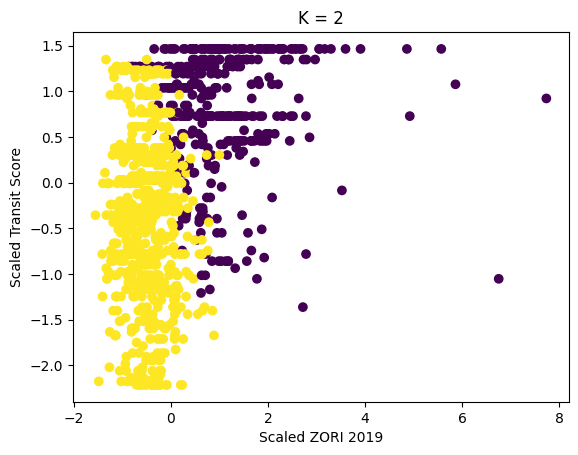

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


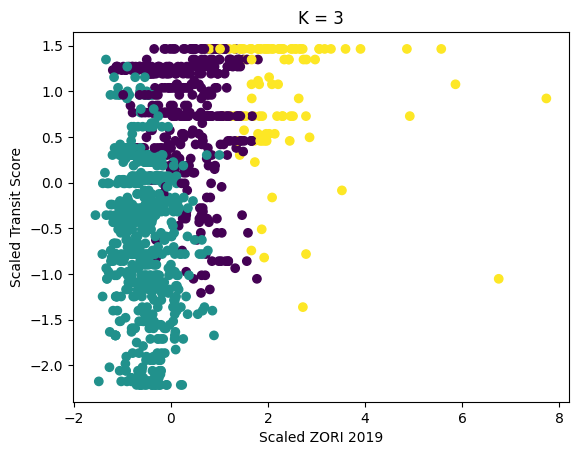

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


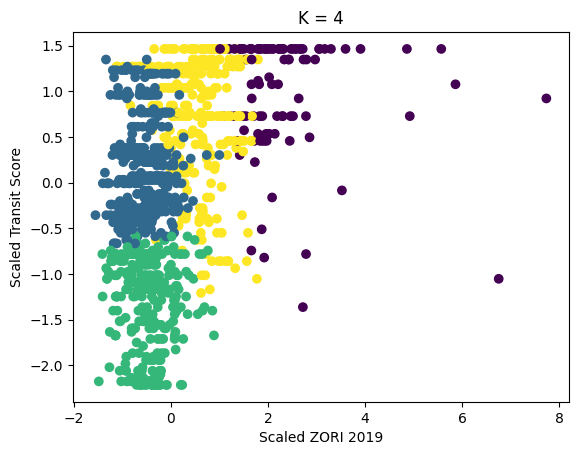

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


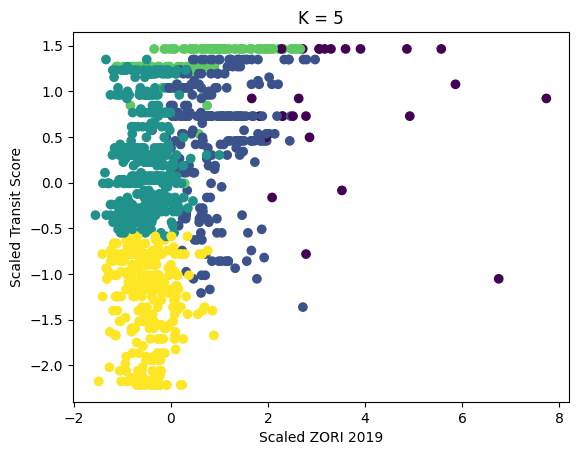

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


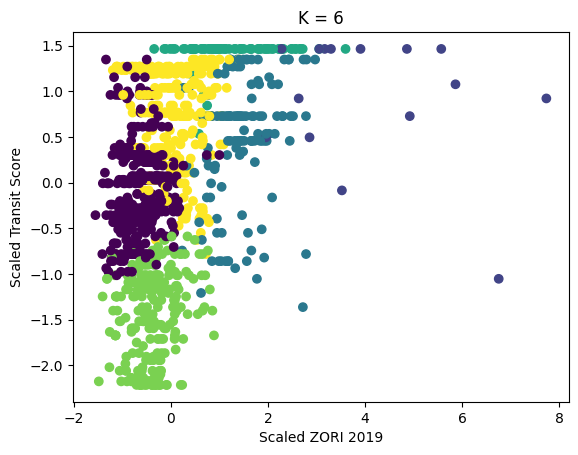

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


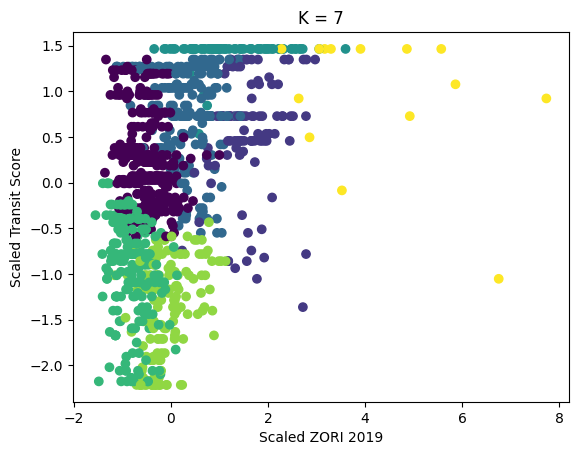

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


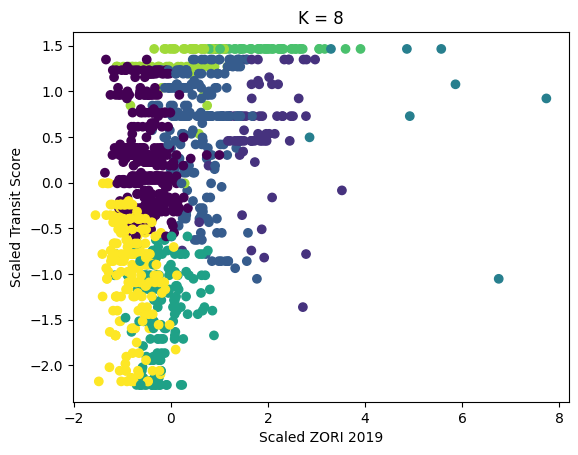

/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


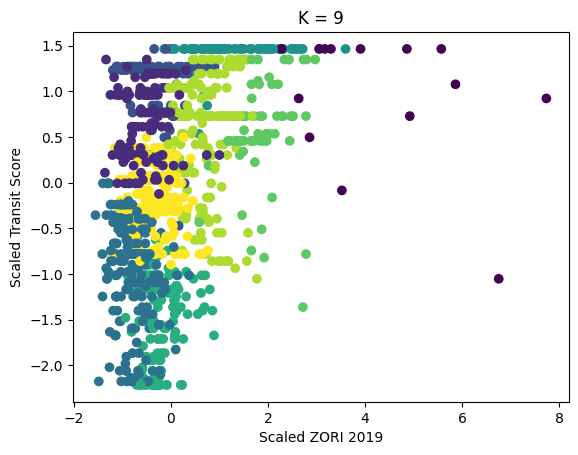

<Figure size 640x480 with 0 Axes>

In [112]:
for k in range(2, 10):
    kmeans5 = KMeans(n_clusters=k).fit(scaled_df)
    cluster_labels = kmeans5.predict(scaled_df)
    plt.scatter(zori_scaled, transit_scores_scaled, c=cluster_labels)
    plt.title(f"K = {k}")
    plt.ylabel('Scaled Transit Score')
    plt.xlabel('Scaled ZORI 2019')
    plt.show()
    plt.clf()

In [120]:
combined1 = np.column_stack((zhvi_scaled, sales_scaled))
for k in range(2, 10):
    print(f"k={k}")
    clusters = KMeans(n_clusters = k).fit_predict(combined1)
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print()

k=2
Cluster 0 count: 866
Cluster 1 count: 301

k=3
Cluster 0 count: 841
Cluster 1 count: 66
Cluster 2 count: 260

k=4
Cluster 0 count: 71
Cluster 1 count: 76
Cluster 2 count: 519
Cluster 3 count: 501

k=5
Cluster 0 count: 14
Cluster 1 count: 448
Cluster 2 count: 76
Cluster 3 count: 146
Cluster 4 count: 483

k=6
Cluster 0 count: 449
Cluster 1 count: 439
Cluster 2 count: 57
Cluster 3 count: 141
Cluster 4 count: 67
Cluster 5 count: 14

k=7


/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Cluster 0 count: 424
Cluster 1 count: 178
Cluster 2 count: 57
Cluster 3 count: 383
Cluster 4 count: 14
Cluster 5 count: 67
Cluster 6 count: 44

k=8
Cluster 0 count: 306
Cluster 1 count: 63
Cluster 2 count: 17
Cluster 3 count: 35
Cluster 4 count: 61
Cluster 5 count: 166
Cluster 6 count: 234
Cluster 7 count: 285

k=9
Cluster 0 count: 301
Cluster 1 count: 57
Cluster 2 count: 67
Cluster 3 count: 162
Cluster 4 count: 30
Cluster 5 count: 285
Cluster 6 count: 13
Cluster 7 count: 40
Cluster 8 count: 212



/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
combined2 = np.column_stack((zhvi_scaled, transit_scores_scaled))
for k in range(2, 10):
    print(f"k={k}")
    clusters = KMeans(n_clusters = k).fit_predict(combined2)
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print()

k=2
Cluster 0 count: 677
Cluster 1 count: 490

k=3
Cluster 0 count: 503
Cluster 1 count: 546
Cluster 2 count: 118

k=4
Cluster 0 count: 94
Cluster 1 count: 367
Cluster 2 count: 241
Cluster 3 count: 465

k=5
Cluster 0 count: 461
Cluster 1 count: 307
Cluster 2 count: 16
Cluster 3 count: 143
Cluster 4 count: 240

k=6
Cluster 0 count: 207
Cluster 1 count: 241
Cluster 2 count: 77
Cluster 3 count: 171
Cluster 4 count: 458
Cluster 5 count: 13

k=7


/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Cluster 0 count: 120
Cluster 1 count: 160
Cluster 2 count: 372
Cluster 3 count: 75
Cluster 4 count: 216
Cluster 5 count: 211
Cluster 6 count: 13

k=8
Cluster 0 count: 210
Cluster 1 count: 186
Cluster 2 count: 154
Cluster 3 count: 13
Cluster 4 count: 331
Cluster 5 count: 77
Cluster 6 count: 124
Cluster 7 count: 72

k=9
Cluster 0 count: 124
Cluster 1 count: 332
Cluster 2 count: 74
Cluster 3 count: 195
Cluster 4 count: 153
Cluster 5 count: 5
Cluster 6 count: 21
Cluster 7 count: 77
Cluster 8 count: 186



/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [122]:
combined3 = np.column_stack((zori_scaled, sales_scaled))
for k in range(2, 10):
    print(f"k={k}")
    clusters = KMeans(n_clusters = k).fit_predict(combined3)
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print()

k=2
Cluster 0 count: 835
Cluster 1 count: 332

k=3
Cluster 0 count: 399
Cluster 1 count: 675
Cluster 2 count: 93

k=4
Cluster 0 count: 90
Cluster 1 count: 483
Cluster 2 count: 460
Cluster 3 count: 134

k=5
Cluster 0 count: 193
Cluster 1 count: 407
Cluster 2 count: 99
Cluster 3 count: 432
Cluster 4 count: 36

k=6
Cluster 0 count: 190
Cluster 1 count: 349
Cluster 2 count: 74
Cluster 3 count: 13
Cluster 4 count: 118
Cluster 5 count: 423

k=7


/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Cluster 0 count: 200
Cluster 1 count: 420
Cluster 2 count: 64
Cluster 3 count: 47
Cluster 4 count: 80
Cluster 5 count: 350
Cluster 6 count: 6

k=8
Cluster 0 count: 286
Cluster 1 count: 182
Cluster 2 count: 62
Cluster 3 count: 47
Cluster 4 count: 217
Cluster 5 count: 6
Cluster 6 count: 80
Cluster 7 count: 287

k=9
Cluster 0 count: 273
Cluster 1 count: 84
Cluster 2 count: 170
Cluster 3 count: 56
Cluster 4 count: 42
Cluster 5 count: 285
Cluster 6 count: 196
Cluster 7 count: 55
Cluster 8 count: 6



/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [123]:
combined4 = np.column_stack((zori_scaled, transit_scores_scaled))
for k in range(2, 10):
    print(f"k={k}")
    clusters = KMeans(n_clusters = k).fit_predict(combined4)
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print()

k=2
Cluster 0 count: 700
Cluster 1 count: 467

k=3
Cluster 0 count: 485
Cluster 1 count: 208
Cluster 2 count: 474

k=4
Cluster 0 count: 322
Cluster 1 count: 448
Cluster 2 count: 149
Cluster 3 count: 248

k=5
Cluster 0 count: 235
Cluster 1 count: 51
Cluster 2 count: 242
Cluster 3 count: 438
Cluster 4 count: 201

k=6
Cluster 0 count: 234
Cluster 1 count: 209
Cluster 2 count: 186
Cluster 3 count: 42
Cluster 4 count: 383
Cluster 5 count: 113

k=7


/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Cluster 0 count: 208
Cluster 1 count: 200
Cluster 2 count: 384
Cluster 3 count: 6
Cluster 4 count: 114
Cluster 5 count: 79
Cluster 6 count: 176

k=8
Cluster 0 count: 237
Cluster 1 count: 80
Cluster 2 count: 172
Cluster 3 count: 134
Cluster 4 count: 94
Cluster 5 count: 258
Cluster 6 count: 186
Cluster 7 count: 6

k=9
Cluster 0 count: 190
Cluster 1 count: 182
Cluster 2 count: 117
Cluster 3 count: 6
Cluster 4 count: 71
Cluster 5 count: 174
Cluster 6 count: 158
Cluster 7 count: 189
Cluster 8 count: 80



/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachbecker/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [124]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

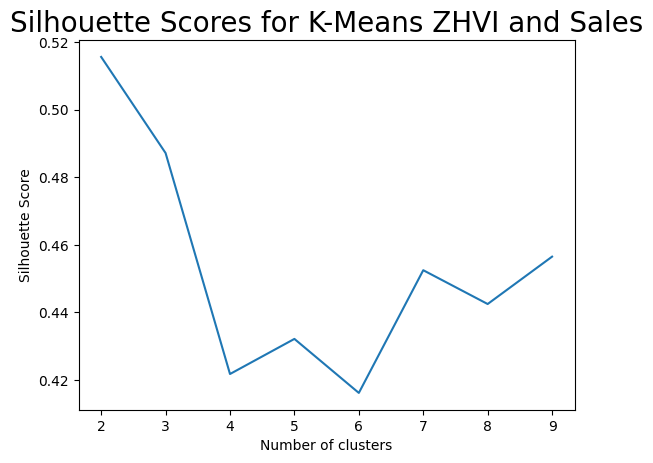

In [134]:
n_clusters = np.arange(2, 10)
sils = []
sils_err = []
iterations = 5

for n in n_clusters:
    tmp_sil = []
    for _ in range(iterations):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42).fit(combined1)
        labels = kmeans.labels_
        sil = silhouette_score(combined1, labels, metric='euclidean')
        tmp_sil.append(sil)
    val = np.mean(tmp_sil)
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores for K-Means ZHVI and Sales", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

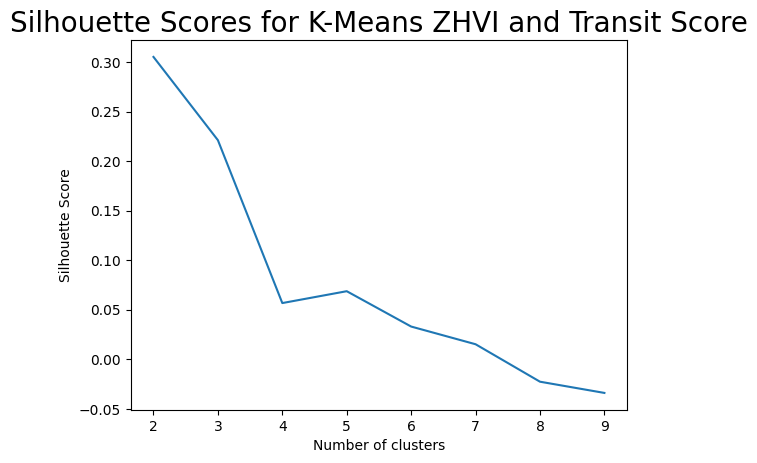

In [129]:
n_clusters = np.arange(2, 10)
sils = []
sils_err = []
iterations = 5

for n in n_clusters:
    tmp_sil = []
    for _ in range(iterations):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42).fit(combined1)
        labels = kmeans.labels_
        sil = silhouette_score(combined2, labels, metric='euclidean')
        tmp_sil.append(sil)
    val = np.mean(tmp_sil)
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores for K-Means ZHVI and Transit Score", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

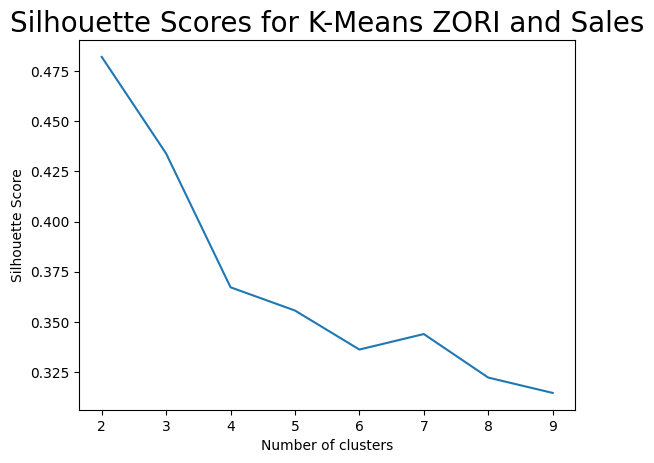

In [132]:
n_clusters = np.arange(2, 10)
sils = []
sils_err = []
iterations = 5

for n in n_clusters:
    tmp_sil = []
    for _ in range(iterations):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42).fit(combined1)
        labels = kmeans.labels_
        sil = silhouette_score(combined3, labels, metric='euclidean')
        tmp_sil.append(sil)
    val = np.mean(tmp_sil)
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores for K-Means ZORI and Sales", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

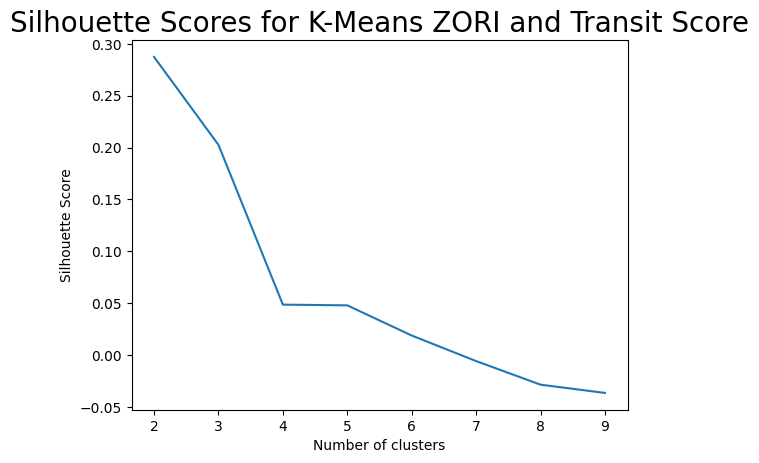

In [133]:
n_clusters = np.arange(2, 10)
sils = []
sils_err = []
iterations = 5

for n in n_clusters:
    tmp_sil = []
    for _ in range(iterations):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42).fit(combined1)
        labels = kmeans.labels_
        sil = silhouette_score(combined4, labels, metric='euclidean')
        tmp_sil.append(sil)
    val = np.mean(tmp_sil)
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores for K-Means ZORI and Transit Score", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

Getting very low silhouette scores for the transit score clusterings. Will plan on using ZHVI and Sales. 4 clusters seems to be the best option here.

In [142]:
numeric_df = df_2019.select_dtypes(include=[np.number])

In [149]:
cluster_labels = kmeans1.labels_
df_2019['Cluster'] = cluster_labels


In [155]:
numeric_cols = df_2019.select_dtypes(include=[np.number]).columns.tolist()
cluster_characteristics = df_2019.groupby('Cluster')[numeric_cols].mean()
print(cluster_characteristics)


            ZHVI 2019    ZORI 2019    Sales 2019  Sale Listings 2019  \
Cluster                                                                
0        2.212309e+05  1169.909974   1859.295670         6570.766014   
1        2.880563e+05  1437.427408   7272.912538        27427.159159   
2        1.078606e+06  2825.372133  16617.083333        87222.083333   
3        9.072475e+05  2509.909614   3873.472222         9688.371981   
4        1.773344e+06  3280.225491   5892.211538        18682.589744   
5        7.997744e+05  2295.486923   8664.112963        28041.476543   
6        3.337163e+05  1703.524216  13489.146825        55990.654762   
7        3.772575e+05  1578.129568   4503.210687        12801.587763   
8        3.108646e+06  5000.711062  12295.222222        58351.138889   

         Days on Market 2019  New Construction 2019  Transit Score  \
Cluster                                                              
0                  59.523132             187.417556       4.481495 

In [164]:
features = ['ZHVI 2019','ZORI 2019','Sales 2019','Sale Listings 2019','Days on Market 2019','New Construction 2019','Transit Score','SizeRankZip','NatWalkInd'] 
anova_results = {}

for feature in features:
    groups = [df_2019[df_2019['Cluster'] == k][feature] for k in range(4)]  
    anova_result = f_oneway(*groups)
    anova_results[feature] = {'F-statistic': anova_result.statistic, 'p-value': anova_result.pvalue}

for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result['F-statistic']}, p-value = {result['p-value']}")


ZHVI 2019: F-statistic = 836.6080878958254, p-value = 4.963629496274983e-219
ZORI 2019: F-statistic = 483.885202062093, p-value = 6.692325855943899e-163
Sales 2019: F-statistic = 4810.490463544211, p-value = 0.0
Sale Listings 2019: F-statistic = 6730.168944745223, p-value = 0.0
Days on Market 2019: F-statistic = 212.70598647321583, p-value = 3.112923037145105e-95
New Construction 2019: F-statistic = 298.6727166637228, p-value = 1.6688699703889883e-120
Transit Score: F-statistic = 115.71297801590723, p-value = 1.1291171443052414e-59
SizeRankZip: F-statistic = 7.30182479415083, p-value = 8.092922085291426e-05
NatWalkInd: F-statistic = 75.42239345304665, p-value = 1.108034064525546e-41


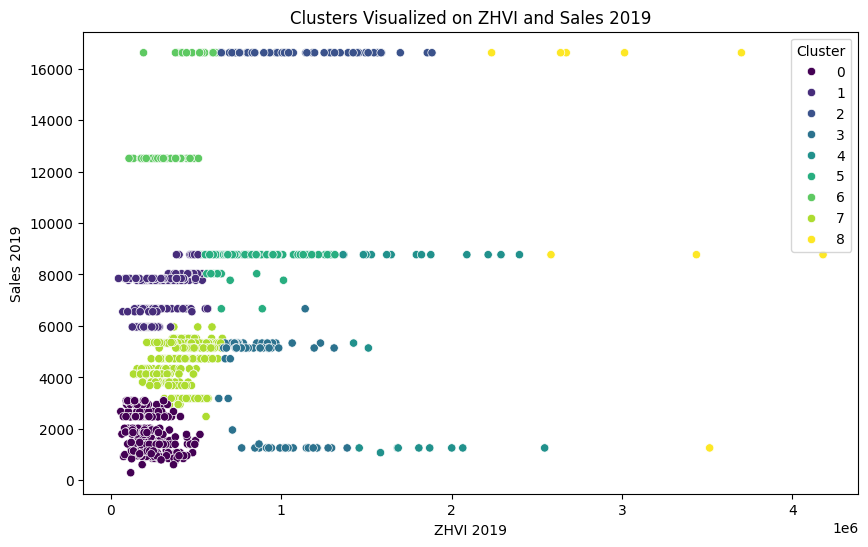

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2019, x='ZHVI 2019', y='Sales 2019', hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters Visualized on ZHVI and Sales 2019')
plt.xlabel('ZHVI 2019')
plt.ylabel('Sales 2019')
plt.legend(title='Cluster')
plt.show()

In [175]:
#When looking at just 4 clusters

numeric_cols = df_2019.select_dtypes(include=[np.number]).columns.tolist()
cluster_characteristics = df_2019.groupby('Cluster')[numeric_cols].mean()
print(cluster_characteristics)

            ZHVI 2019    ZORI 2019    Sales 2019  Sale Listings 2019  \
Cluster                                                                
0        2.654664e+05  1347.782217   4804.446960        17088.194851   
1        1.334646e+06  2971.712549   9484.444158        41877.311856   
2        6.695769e+05  2133.067336   7811.743192        28078.142974   
3        2.878915e+06  4826.762017  10632.967949        47246.929487   

         Days on Market 2019  New Construction 2019  Transit Score  \
Cluster                                                              
0                  55.356303             474.896249       4.986684   
1                  61.533505             382.643471       7.898969   
2                  50.579248             446.504902       7.099673   
3                  64.410256             389.544872       7.969231   

             RegionID    RegionName  SizeRankZip    Population  NatWalkInd  \
Cluster                                                             

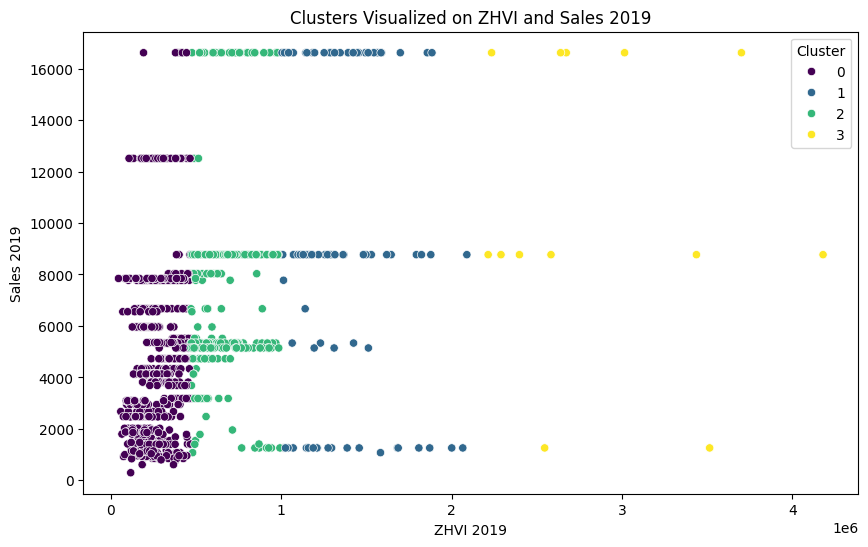

In [176]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2019, x='ZHVI 2019', y='Sales 2019', hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters Visualized on ZHVI and Sales 2019')
plt.xlabel('ZHVI 2019')
plt.ylabel('Sales 2019')
plt.legend(title='Cluster')
plt.show()